# Taller 1 - Esteban Ortiz

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Bangkok, Central Thailand, Thailand [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context (Español):** Ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma Airbnb. Mediante el uso de técnicas estadísticas y de visualización de datos se espera descubrir patrones, tendencias y oportunidades que puedan ser de
interés para un inversionista.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Carga de datos

In [3]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("listings.csv.gz")

In [4]:
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
12950,705478539716650994,https://www.airbnb.com/rooms/705478539716650994,20230626155734,2023-06-27,city scrape,"Condo in Phra khanong Nuea, Khlongtoei · ★4.86...",ห้องสวย สะอาด พักที่นี่แล้วเหมือนอยู่บ้านเลยคะ...,We called onnut area. Many foreigner stay here...,https://a0.muscache.com/pictures/miso/Hosting-...,68228740,https://www.airbnb.com/users/show/68228740,Su,2016-04-21,"Bangkok, Thailand","Love travel, Like to explore the world, Foodie...",within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/95c65...,https://a0.muscache.com/im/pictures/user/95c65...,NaN,5,5,"['email', 'phone']",t,t,"Phra khanong Nuea, Khlongtoei, Bangkok, Thailand",Khlong Toei,NaN,13.704860,100.593300,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pool"", ""Free parking on premises"", ""Host gre...","$1,000.00",15,365,15,15,1125,1125,15.0,1125.0,NaN,t,1,31,61,306,2023-06-27,7,7,0,2022-10-31,2023-03-12,4.86,5.0,4.71,4.57,5.0,4.71,5.0,NaN,f,2,2,0,0,0.88
8344,38436897,https://www.airbnb.com/rooms/38436897,20230626155734,2023-06-27,previous scrape,Rental unit in Khet Yan Nawa · 2 bedrooms · 2 ...,High ceilings and large windows are some of th...,NaN,https://a0.muscache.com/pictures/916ffcb1-9a3c...,124863072,https://www.airbnb.com/users/show/124863072,은영,2017-04-08,"Bangkok, Thailand",Regards,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/1898a...,https://a0.muscache.com/im/pictures/user/1898a...,Yan Nawa,10,10,[],t,f,NaN,Yan na wa,NaN,13.677250,100.545270,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Smoking allowed"", ""Free parking on premises""...","$3,841.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,f,0,0,0,0,2023-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN
11204,51565744,https://www.airbnb.com/rooms/51565744,20230626155734,2023-06-27,previous scrape,Home in Khet Don Mueang · 1 bedroom · 4 beds ·...,ที่พักมีสไตล์เหมาะกับทริป(มีหมาและแมว)<br /><b...,ใกล้ สำนักงานเขต ดอนเมือง,https://a0.muscache.com/pictures/35e87a4a-1551...,417742234,https://www.airbnb.com/users/show/417742234,Chet,2021-08-10,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/450ce...,https://a0.muscache.com/im/pictures/user/450ce...,NaN,1,1,['phone'],t,f,"Khet Don Mueang, Krung Thep Maha Nakhon, Thailand",Don Mueang,NaN,13.920244,100.576614,Private room in home,Private room,4,NaN,1 shared bath,NaN,4.0,"[""Iron"", ""Ceiling fan"", ""City skyline view"", ""...",$850.00,1,365,1,1,365,365,1.0,365.0,NaN,f,0,0,0,0,2023-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
16155,837984134425168211,https://www.airbnb.com/rooms/837984134425168211,20230626155734,2023-06-27,city scrape,Serviced apartment in Kh

## 2.  Entendimiento inicial de datos

Generar un breve reporte de entendimiento
inicial de datos en donde destaque las dimensiones del dataset, los tipos de datos
que contiene y el top 5 de los atributos que considera más importantes para el
análisis. Por cada atributo incluya algunos elementos básicos de su
comportamiento o distribución (análisis univariado).

In [5]:
# Dimensiones del dataset
listings_df.shape

(18879, 75)

Tenemos 18879 datos y 75 columnas

In [6]:
# Columnas que contiene el dataset. Son  75 en total
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
# Cuales son los tipos de datos de estas 75 columnas
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

### Teniendo el contexto del negocio y asociandolo con el diccionario de datos. Se encontraron varias columnas que se consideran relevantes para el análisis de datos. A continuación se nombrarán y se explicará el por qué de su elección.

* **name:** Esta columna podría da información sobre como se comercializan las propiedades en la plataforma.

* **description:** Esta columna  ser valiosa para comprender las caractaristicas únicas que tiene cada propiedad y como estas influencian la decisión de los usuarios.

* **neighborhood_overview:** Esto puede resultar útil para inversores que quieran saber más sobre la zona donde se encuentra la propiedad.

* **host_id:** Importante para indentificar a los anfitriones y conocer su influencia en la opinion de los usuarios.

* **latitude y longitude:** Esencial para mapeo y análisis espacial si se desea implementar.

* **property_type:** Es posible que los inversores quieran filtrar propiedades según su tipo y ver como se comportan, por ejemplo, apartamentos, casas o condominios.

* **room_type:** Es posible que los inversores quieran filtrar habitaciones según su tipo y ver como se comportan, por ejemplo, habitaciones privadas, compartidas o enteras.

* **accommodates:** Importante para comprender el potencial de la propiedad para alojar huéspedes.

* **bedrooms, bathrooms, and beds:** Estas columnas proporcionan información sobre el tamaño y la capacidad de la propiedad.

* **amenities:** Conocer las comodidades puede ayudar a los inversores a comprender el atractivo de la propiedad.

* **price:** Crítico para evaluar la rentabilidad de la propiedad y fijar las tarifas de alquiler.

* **number_of_reviews and reviews_per_month:** Los datos de las reseñas pueden indicar la popularidad y la calidad de la propiedad.

* **instant_bookable:** Importante para inversores que buscan propiedades con opciones de reserva flexibles.

* **calculated_host_listings_count:** Es posible que los inversores quieran considerar la experiencia y el compromiso del anfitrión.

* **availability_30, availability_60, availability_90, and availability_365:** los datos de disponibilidad pueden ayudar a los inversores a evaluar las tasas de ocupación y la demanda de la propiedad.

* **review_scores_rating:** Proporciona una visión general rápida de la calidad de la propiedad.

De estas 75 columnas solo vamos a dejar las que por el momento e consideran relevantes para el análisis. Y Se profundizará más en ellas análizando sus diferentes características.

In [8]:
# Lista de columnas útiles
columnas_utiles = [
    'name', 'description', 'neighborhood_overview', 'host_id', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
    'amenities', 'price', 'number_of_reviews', 'reviews_per_month', 'instant_bookable',
    'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'review_scores_rating'
]

# Seleccionamos las columnas útiles
listings_df = listings_df[columnas_utiles]

In [9]:
listings_df.sample(5)

,name,description,neighborhood_overview,host_id,latitude,longitude,property_type,room_type,accommodates,bedrooms,bathrooms,beds,amenities,price,number_of_reviews,reviews_per_month,instant_bookable,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,review_scores_rating
15126,Home in Khet Watthana · ★5.0 · 5 bedrooms · 7 ...,Experience the ultimate in luxury living at th...,NaN,46163812,13.720286,100.586395,Entire home,Entire home/apt,16,5.0,NaN,7.0,"[""Iron"", ""Carbon monoxide alarm"", ""Oven"", ""Win...","$26,542.00",13,2.41,t,8,28,58,88,356,5.00
3753,Home in Phra Khanang · ★4.74 · 6 bedrooms · 8 ...,This house is massive. Relaxing outdoor garden...,Our house is in a very central location. We ar...,5711286,13.716064,100.589707,Entire home,Entire home/apt,16,6.0,NaN,8.0,"[""Iron"", ""Breakfast"", ""City skyline view"", ""Hi...","$8,543.00",27,2.23,t,4,11,25,47,298,4.74
14345,Rental unit in Krung Thep Maha Nakhon · 1 bedr...,"Location, location, location... Centrally loca...",NaN,16495055,13.746186,100.562525,Entire rental unit,Entire home/apt,2,1.0,NaN,1.0,"[""Iron"", ""Shared pool - available all year"", ""...","$1,000.00",1,0.54,f,1,0,0,0,0,5.00
15926,Rental unit in Khet Khlong Toei · ★4.94 · 1 be...,Located in a quiet neighborhood in the heart o...,"Enjoy the convenience of nearby shopping, dini...",19213283,13.723542,100.564371,Entire rental unit,Entire home/apt,2,1.0,NaN,1.0,"[""Iron"", ""Carbon monoxide alarm"", ""Wine glasse...","$1,277.00",16,4.03,t,14,8,34,64,154,4.94
6509,Rental unit in Khet Ratchathewi · ★4.56 · 2 be...,Fully furnished and decorated 57 sqm 2 bed 1 b...,Close to Kingpower at Soi Rang Nam so great fo...,59113930,13.761650,100.542660,Entire rental unit,Entire home/apt,4,2.0,NaN,3.0,"[""Iron"", ""City skyline view"", ""Exercise equipm...","$1,250.00",9,0.20,f,3,5,14,44,113,4.56


In [10]:
listings_df.shape

(18879, 23)

In [11]:
# Contar valores nulos por columna
listings_df.isnull().sum()

name                                  0
description                         559
neighborhood_overview              9610
host_id                               0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bedrooms                           4946
bathrooms                         18879
beds                                328
amenities                             0
price                                 0
number_of_reviews                     0
reviews_per_month                  6598
instant_bookable                      0
calculated_host_listings_count        0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
review_scores_rating               6598
dtype: int64

In [12]:
pd.set_option('display.max_colwidth', None) # Mostrar los valores completos, sin truncar

In [13]:
# Observar los nombres de los alojamientos que tienen beedrooms nulas. Mostrar 15 valores.
listings_df[listings_df['bedrooms'].isnull()][['name']].sample(15)

,name
114,"Rental unit in Silom, Bangrak · ★4.58 · 1 bedroom · 1 bed · 1 private bath"
7412,Rental unit in Chatuchak · ★4.73 · Studio · 1 bed · 1 bath
4318,Rental unit in Khet Huai Khwang · 1 bedroom · 1 bed · 1 private bath
16051,Rental unit in Khet Phra Khanong · ★5.0 · 1 bedroom · 1 bed · 1 private bath
5706,Bed and breakfast in Khet Khlong Sam Wa · Studio · 1 bed · 1 private bath
6300,Townhouse in Don Mueang · ★4.95 · 1 bedroom · 1 bed · 1 private bath
10786,Condo in Khet Bang Phlat · Studio · 1 bed · 1 bath
8266,Bed and breakfast in Khet Watthana · 1 bedroom · 1 bed · 3 shared baths
15599,Rental unit in Khet Wang Thonglang · 1 bedroom · 1 bed · 1 bath
17814,Rental unit in Khet Wang Thonglang · ★New · 1 bedroom · 1 bed · 1 private bath


In [14]:
# Obsevar los nombre de los alojamientos que tienen bathrooms nulas. Mostrar 15 valores.
listings_df[listings_df['bathrooms'].isnull()][['name']].sample(15)

,name
11682,Rental unit in Khet Bang Na · ★5.0 · 2 bedrooms · 2 beds · 2.5 baths
11870,Rental unit in Bangkok · 1 bedroom · 1 bed · 1 bath
17758,Rental unit in Khet Huai Khwang · ★5.0 · 1 bedroom · 1 bed · 1 bath
6278,Rental unit in Khet Ratchathewi · ★4.76 · 3 bedrooms · 3 beds · 3 baths
12262,Boutique hotel in Khet Khlong Toei · 1 bedroom · 1 bed · 1 private bath
1365,Rental unit in Bangkok · 1 bedroom · 1 bed · 1 bath
1445,Boutique hotel in Bangkok · ★4.33 · 1 bedroom · 4 beds · 1 private bath
2353,Rental unit in Khet Watthana · ★4.77 · 3 bedrooms · 3 beds · 4 baths
10780,Condo in Khet Ratchathewi · 1 bedroom · 1 bed · 1 bath
6135,Boutique hotel in Khet Phra Nakhon · ★4.80 · 1 bedroom · 1 bed · 0 shared baths


In [15]:
# Observar los nombres de los alojamientos que tienen beds nulas. Mostrar 15 valores.
listings_df[listings_df['beds'].isnull()][['name']].sample(15)

,name
11058,Serviced apartment in Khet Huai Khwang · ★4.0 · 1 bedroom · 1 private bath
9471,Rental unit in Khet Phasi Charoen · Studio · 1 shared bath
9577,Condo in Khlong Toei · ★5.0 · Studio · 1.5 baths
10064,Boutique hotel in Khet Bangkok Noi · 1 bedroom · 1 private bath
10805,Condo in Khet Khlong Toei · ★4.0 · 1 bedroom · 1 bath
9610,Boutique hotel in Chatuchak · 1 bedroom · 1 private bath
10102,Rental unit in Khet Pathum Wan · 1 bedroom · 1 bath
10934,Condo in Khet Bang Rak · 1 bedroom · 1 private bath
10573,Condo in Khet Khlong San · ★5.0 · 1 bedroom · 1 bath
404,Place to stay in Bangkok · 1 bedroom · 1 bath


In [16]:
# Mostrar los valores de reviews_per_month nulos, junto con review scores rating. Mostrar 15 valores.
listings_df[listings_df['reviews_per_month'].isnull()][['review_scores_rating']].sample(15)

,review_scores_rating
16729,NaN
6575,NaN
3263,NaN
9255,NaN
3387,NaN
8994,NaN
4835,NaN
519,NaN
17593,NaN
4317,NaN


### Análisis de los valores nulos:
* **Descripción:** Algunas propiedades no tienen una descripción proporcionada por el host. Este valor nulo se puede reemplazar por un string vacío o eliminar.
* **neighborhood_overview:** Algunas propiedades no tienen una descripción proporcionada por el host. Este valor nulo se puede reemplazar por un string vacío o eliminar.
* **bedrooms:** Algunas propiedades no tienen un número de habitaciones proporcionado por el host. Sin embargo si revisamos el nombre de la propiedad podemos encontrar el número de habitaciones en algunos casos. Por lo que se puede reemplazar por el valor encontrado en el nombre o eliminar.
* **bathrooms:** Algunas propiedades no tienen un número de baños proporcionado por el host. Sin embargo si revisamos el nombre de la propiedad podemos encontrar el número de baños en algunos casos. Por lo que se puede reemplazar por el valor encontrado en el nombre o eliminar.
* **beds:** Algunas propiedades no tienen un número de camas proporcionado por el host. Sin embargo si revisamos el nombre de la propiedad podemos encontrar el número de camas en algunos casos. Por lo que se puede reemplazar por el valor encontrado en el nombre o eliminar.
* **reviews_per_month y review_scores_rating:** Los valores son nulos en las mismas filas. En este caso son más de 6000 datos por lo que eliminarlos tal vez no es la mejor opción. Más adelante se analizará y se tomará una decisión.

### Escogencia de los 5 atributos más importantes para el análisis:

De acuerdo a lo previamente analizado vamos a pasar a escoger los 5 atributos que en contexto de negocio reultan más importantes desde el punto de vista de un inversionista. Estos son:

* **property_type:** Es posible que los inversores quieran filtrar propiedades según su tipo y ver como se comportan, por ejemplo, apartamentos, casas o condominios.

* **room_type:** Es posible que los inversores quieran filtrar habitaciones según su tipo y ver como se comportan, por ejemplo, habitaciones privadas, compartidas o enteras.

* **accommodates:** Importante para comprender el potencial de la propiedad para alojar huéspedes.

* **price:** Estas columnas proporcionan información sobre el tamaño y la capacidad de la propiedad.

* **availability_365:** Los datos de las reseñas pueden indicar la popularidad y la calidad de la propiedad.

### 1. property_type

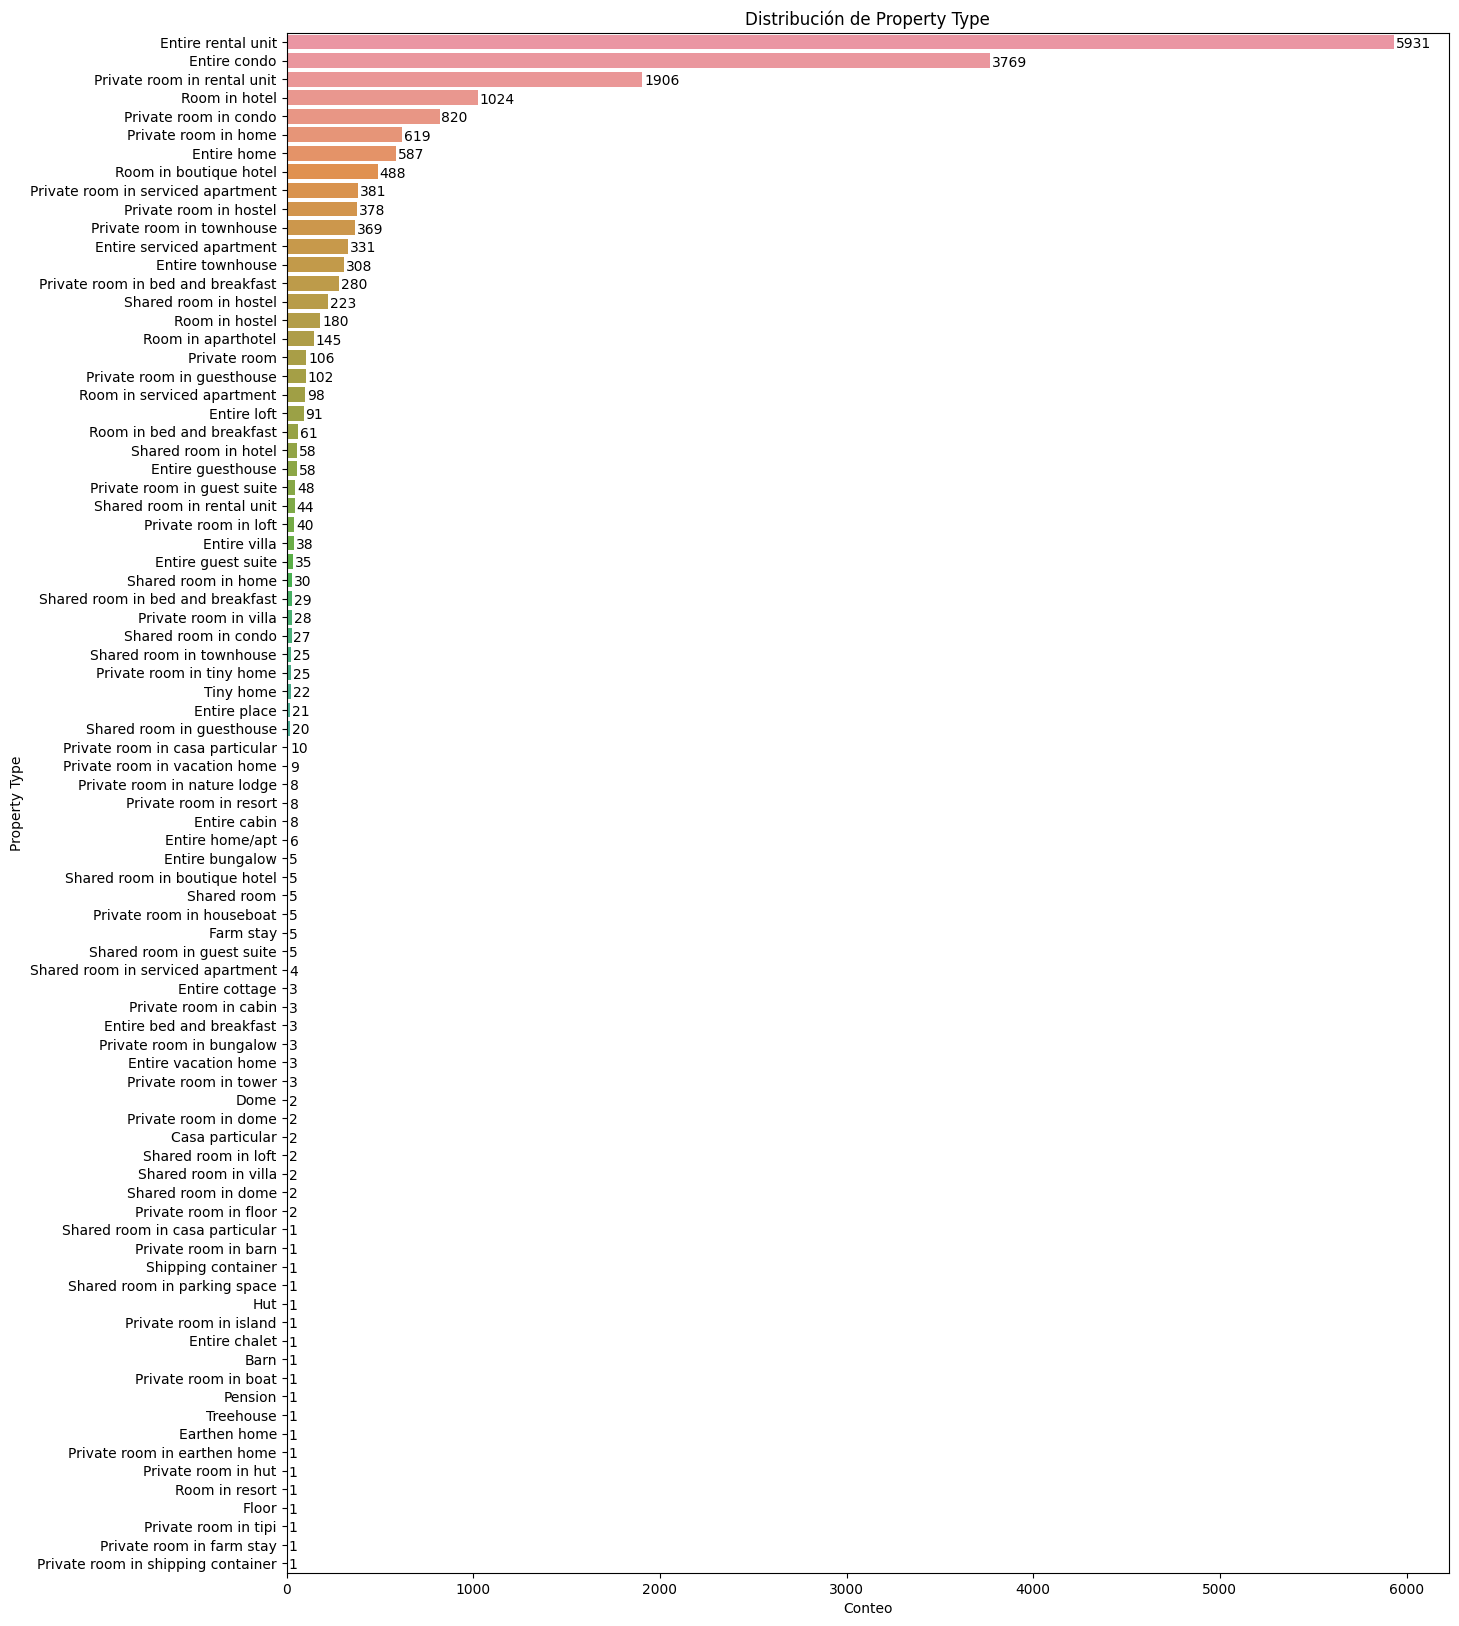

In [17]:
# Gráfico de barras para property_type con etiquetas de valores
plt.figure(figsize=(15, 20))
ax = sns.countplot(data=listings_df, y='property_type', order=listings_df['property_type'].value_counts().index)
plt.title('Distribución de Property Type')
plt.xlabel('Conteo')
plt.ylabel('Property Type')

# Agregar etiquetas de valores con números enteros
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), ha='left', va='center')

plt.show()

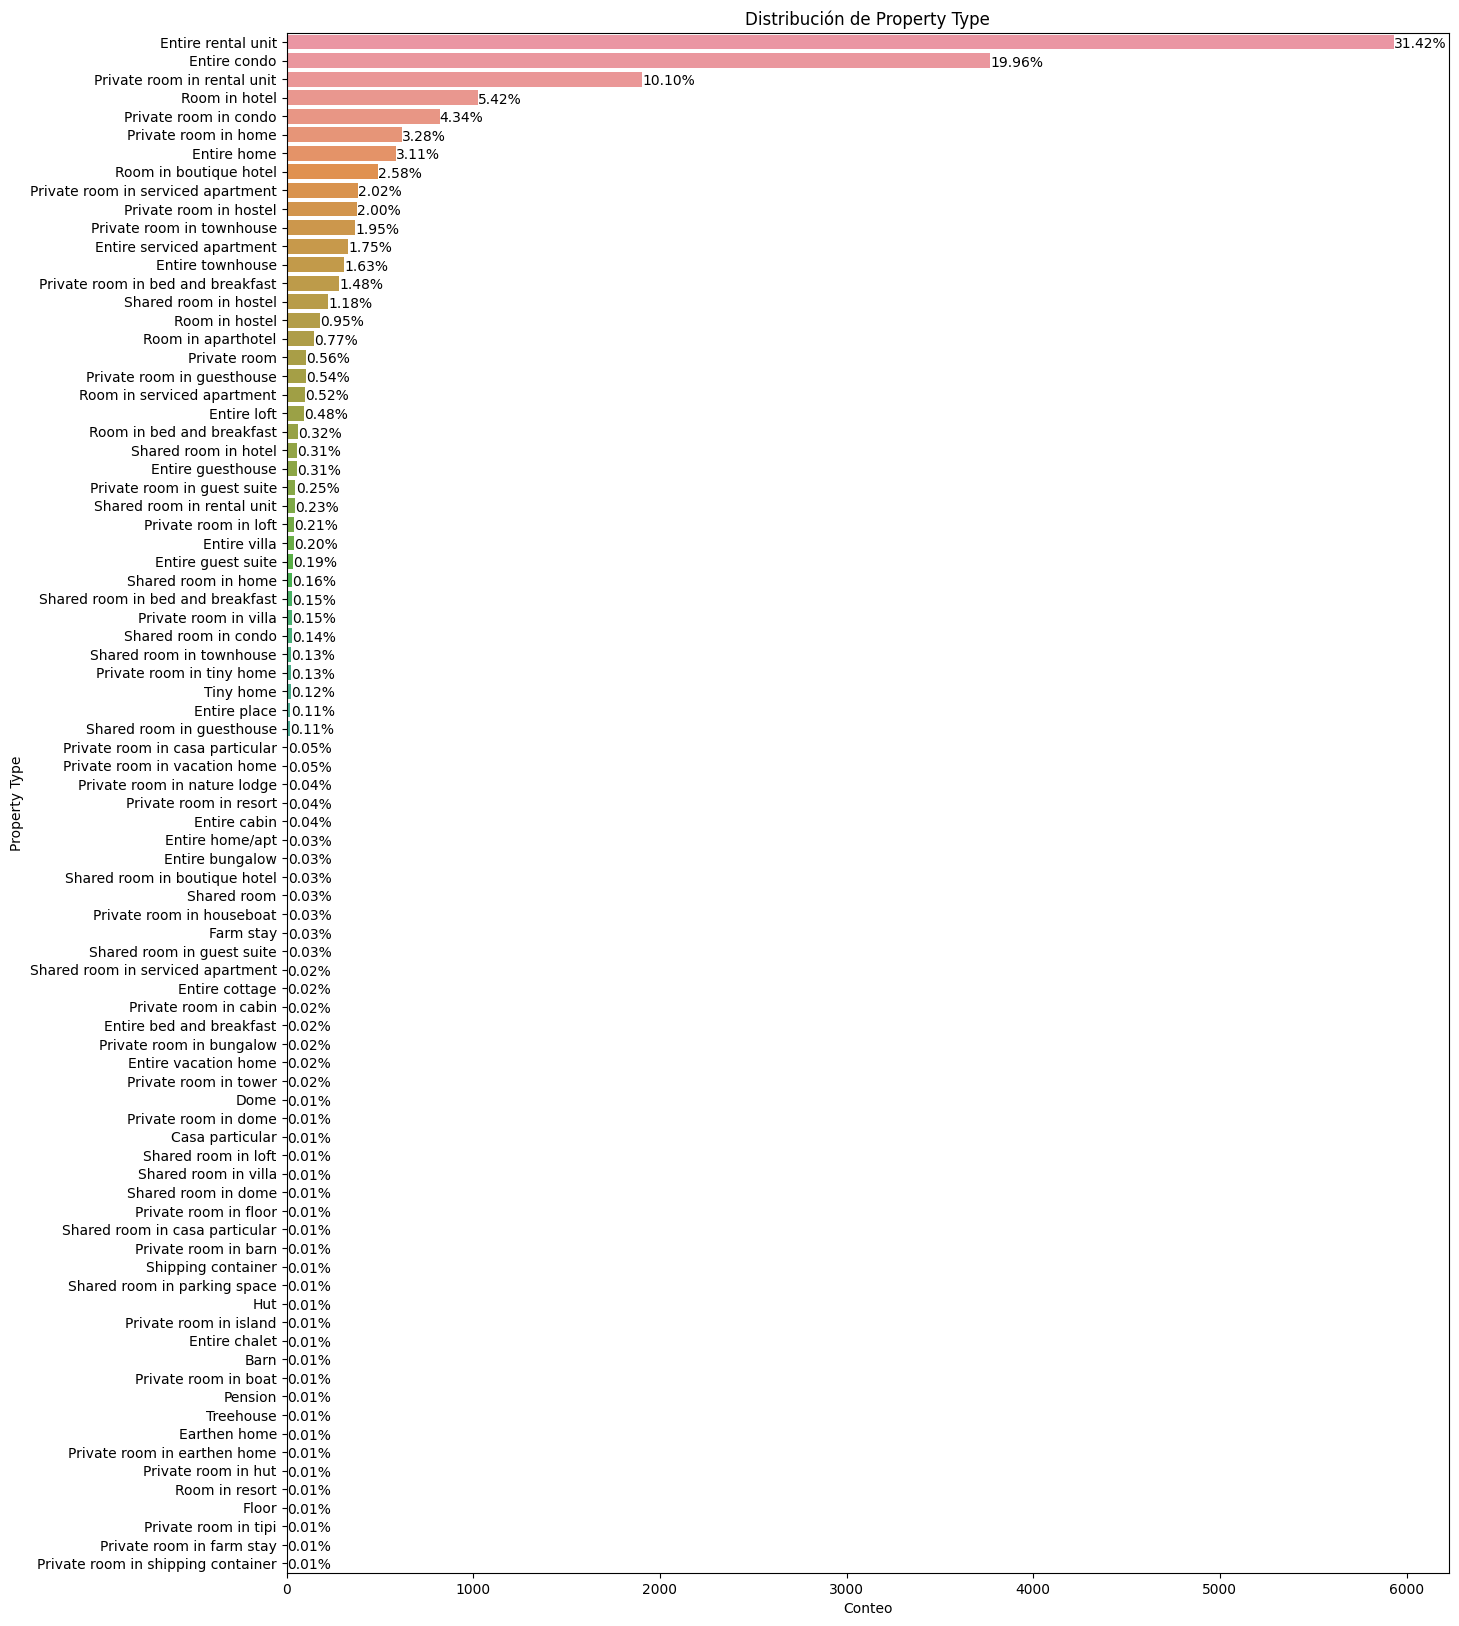

In [18]:
# Gráfico de barras para property_type con etiquetas de porcentajes
plt.figure(figsize=(15, 20))
ax = sns.countplot(data=listings_df, y='property_type', order=listings_df['property_type'].value_counts().index)
plt.title('Distribución de Property Type')
plt.xlabel('Conteo')
plt.ylabel('Property Type')

# Calcular los porcentajes
total_count = len(listings_df)
property_type_counts = listings_df['property_type'].value_counts()
percentages = (property_type_counts / total_count) * 100

# Agregar etiquetas de porcentajes
for p, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.2f}%', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

#### Comentario sobre el análisis de esta variable:

Hay una gran diversidad en el tipo de propiedades. 

Los tipos de propiedad más comunes son "Entire rental unit" (unidad de alquiler completa) y "Entire condo" (condominio completo), que representan una cantidad significativa de las propiedades disponibles.

Además de las unidades de alquiler completas y los condominios, también hay una variedad de otras categorías, como habitaciones privadas en diferentes tipos de alojamientos (por ejemplo, casas, condominios, apartamentos).

Algunas categorías, como "Private room in serviced apartment" (habitación privada en un apartamento de servicio) o "Shared room in hostel" (habitación compartida en un albergue), indican diferentes configuraciones de alojamiento.

Varias categorías tienen un número limitado de propiedades, lo que puede indicar una menor oferta en estas áreas específicas. Por ejemplo, "Treehouse" (cabaña en un árbol), "Shipping container" (contenedor de envío) y "Earthen home" (casa de tierra) tienen solo una o dos propiedades.

### 2. room_type

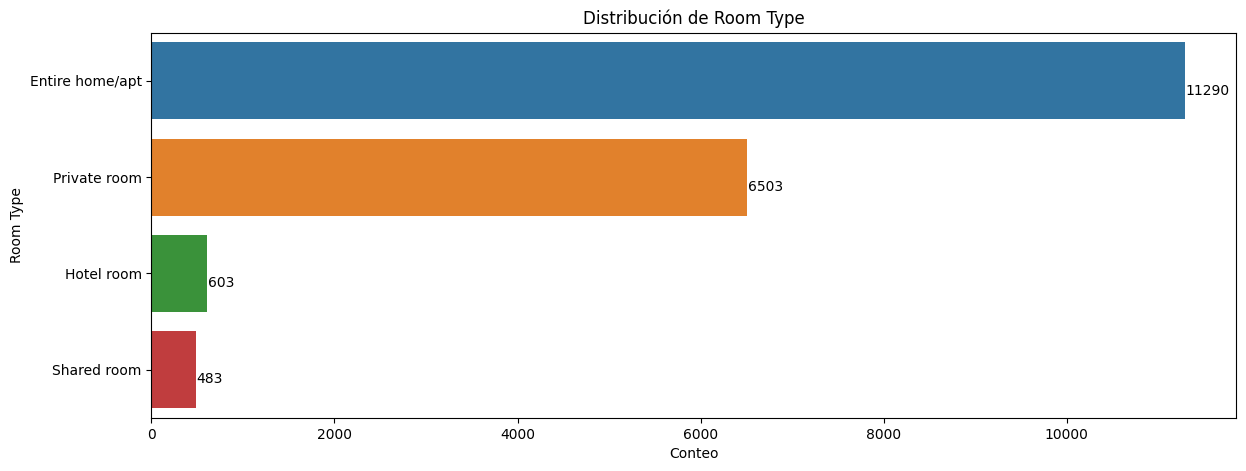

In [19]:
# Gráfico de barras para room_type con etiquetas de valores
plt.figure(figsize=(14, 5))
ax = sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Distribución de Room Type')
plt.xlabel('Conteo')
plt.ylabel('Room Type')

# Agregar etiquetas de valores con números enteros
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), ha='left', va='center')

plt.show()

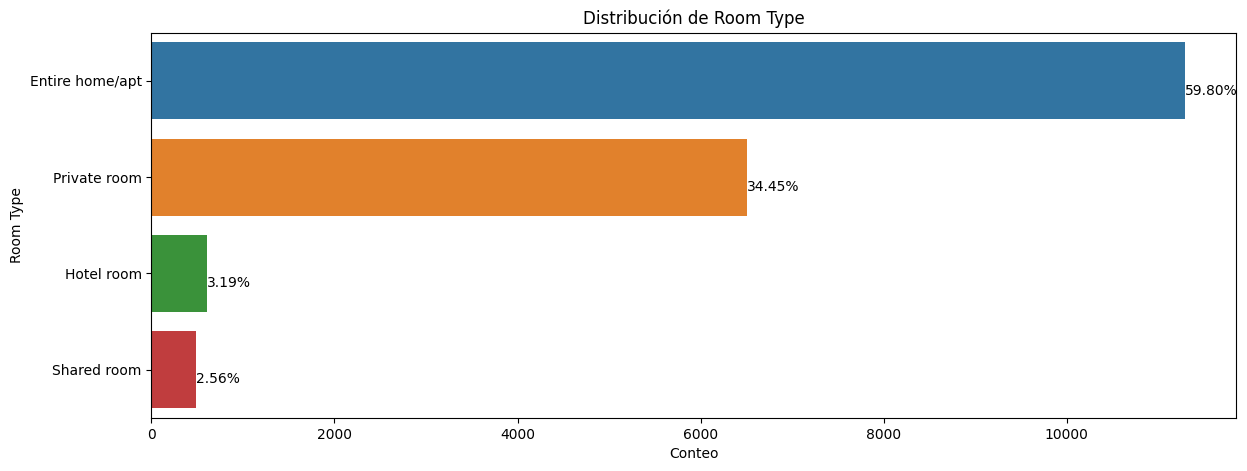

In [20]:
# Gráfico de barras para room_type con etiquetas de porcentajes
plt.figure(figsize=(14, 5))
ax = sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Distribución de Room Type')
plt.xlabel('Conteo')
plt.ylabel('Room Type')

# Calcular los porcentajes
total_count = len(listings_df)
property_type_counts = listings_df['room_type'].value_counts()
percentages = (property_type_counts / total_count) * 100

# Agregar etiquetas de porcentajes
for p, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.2f}%', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

# Nótese que se deja el valor de y del conteo para que el usuario pueda decir 11290 es igual al 59.80%

#### Comentario sobre el análisis de esta variable:

"Entire home/apt" (casa/apartamento completo) es el tipo de habitación más común, lo que indica que la mayoría de las propiedades disponibles son alojamientos completos que los huéspedes pueden reservar en su totalidad.

"Private room" (habitación privada) es la segunda opción más común, lo que sugiere que muchas propiedades ofrecen habitaciones privadas dentro de un alojamiento más grande.

"Hotel room" (habitación de hotel) y "Shared room" (habitación compartida) son menos comunes en comparación con las dos categorías anteriores.

### 3. accommodates

In [21]:
# Estadisticas descriptivas de accommodates
print(listings_df["accommodates"].describe())
print()

# Mediana
print(f"Mediana: {listings_df['accommodates'].median()}")

count    18879.000000
mean         3.069018
std          2.147825
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

Mediana: 2.0


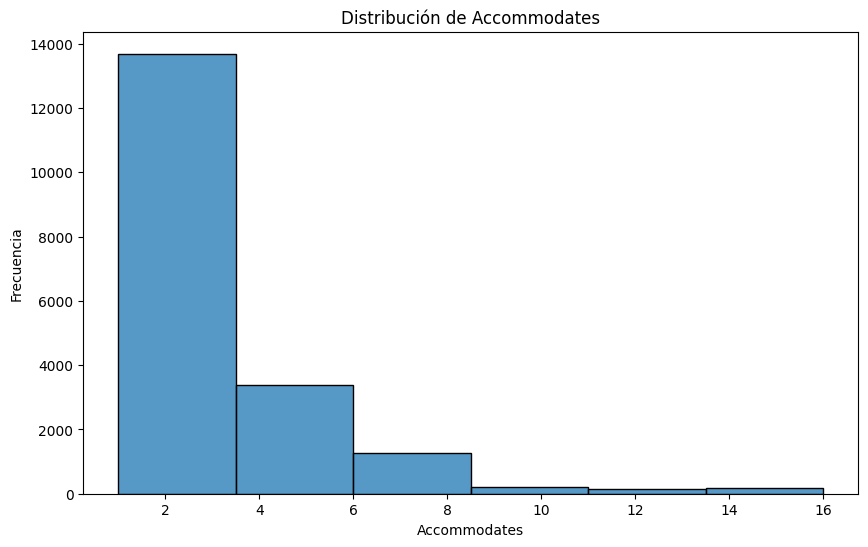

In [22]:
# Histograma de accommodates
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['accommodates'], bins=6)
plt.title('Distribución de Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frecuencia')
plt.show()

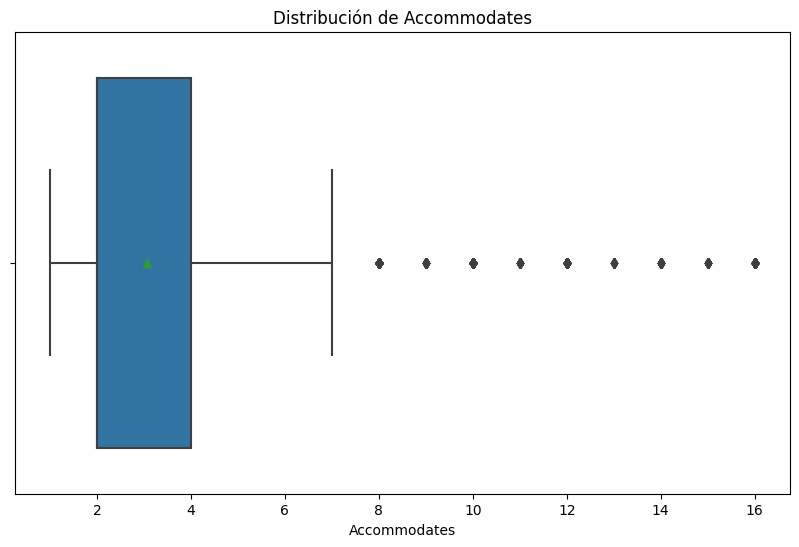

In [23]:
# Grafico de caja de accommodates. Mostrar media
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_df, x='accommodates', showmeans=True)
plt.title('Distribución de Accommodates')
plt.xlabel('Accommodates')
plt.show()

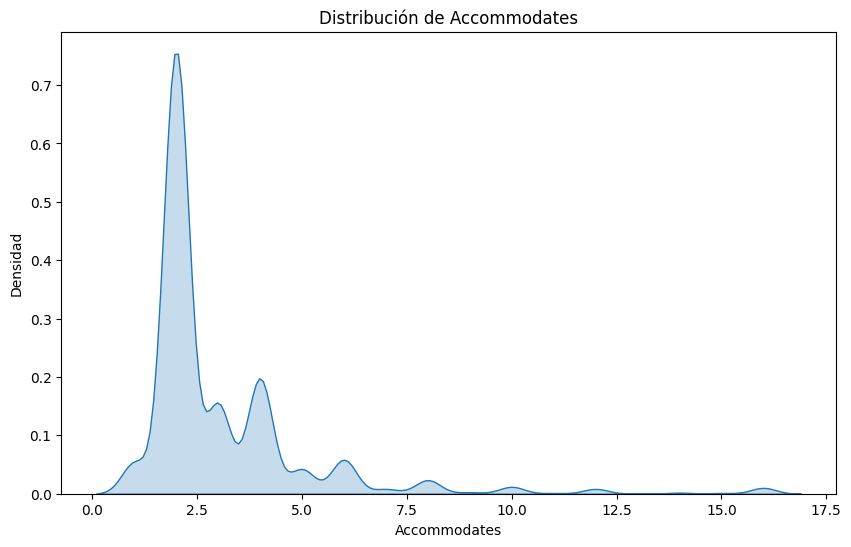

In [24]:
# Gráfico de densidad de accommodates
plt.figure(figsize=(10, 6))
sns.kdeplot(listings_df['accommodates'], fill=True)
plt.title('Distribución de Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Densidad')
plt.show()

#### Comentario sobre el análisis de esta variable:

La mayoría de las propiedades tienen una capacidad de alojamiento de 2 a 4 personas, con una mediana de 2 personas. Sin embargo, hay propiedades con capacidad de hasta 16 personas en el conjunto de datos, lo que indica cierta variabilidad en la capacidad de alojamiento.

Además, podría ser relevante considerar cómo se relaciona esta variable con otras, como el precio y las reseñas, en un análisis multivariado para obtener una imagen más completa de su impacto en la inversión en propiedades de alquiler.

### 4. price

In [25]:
# Eliminar el símbolo de moneda y convertir a float
def convertir_price_a_float(price):
    return float(price.replace('$', '').replace(',', ''))


clean_price = pd.DataFrame()

clean_price["price"] = listings_df['price'].apply(convertir_price_a_float)

In [26]:
# Estadísticas descriptivas de price
print(clean_price.describe())
print()

# Mediana
print(f"Mediana: {clean_price['price'].median()}")


                price
count    18879.000000
mean      2621.033317
std      17648.538571
min        136.000000
25%        890.000000
50%       1350.000000
75%       2191.500000
max    1000000.000000

Mediana: 1350.0


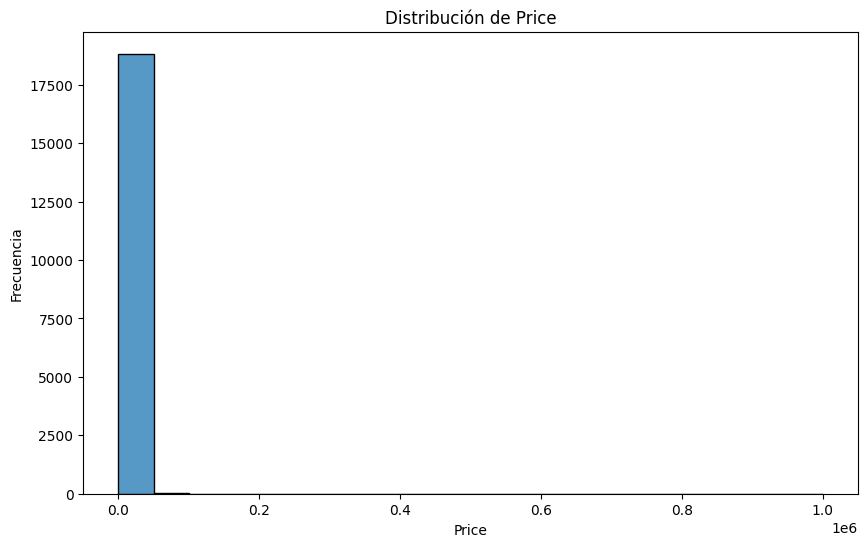

In [27]:
# Histograma de clean_price
plt.figure(figsize=(10, 6))
sns.histplot(clean_price['price'], bins=20)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
# Para obtener una mejor visualización de los datos vamos a elminar outliers superiores

# Clean price quantiles
q1 = clean_price['price'].quantile(0.25)
q3 = clean_price['price'].quantile(0.75)

iqr = q3 - q1

clean_price_irq = clean_price[(clean_price['price'] <= q3 + 1.5 * iqr)]

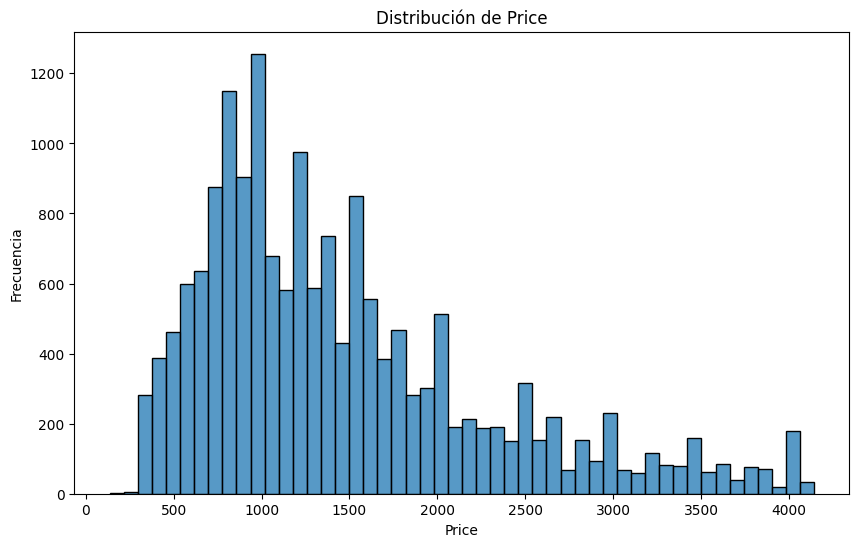

In [29]:
# Histograma de clean_price
plt.figure(figsize=(10, 6))
sns.histplot(clean_price_irq['price'], bins=50)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

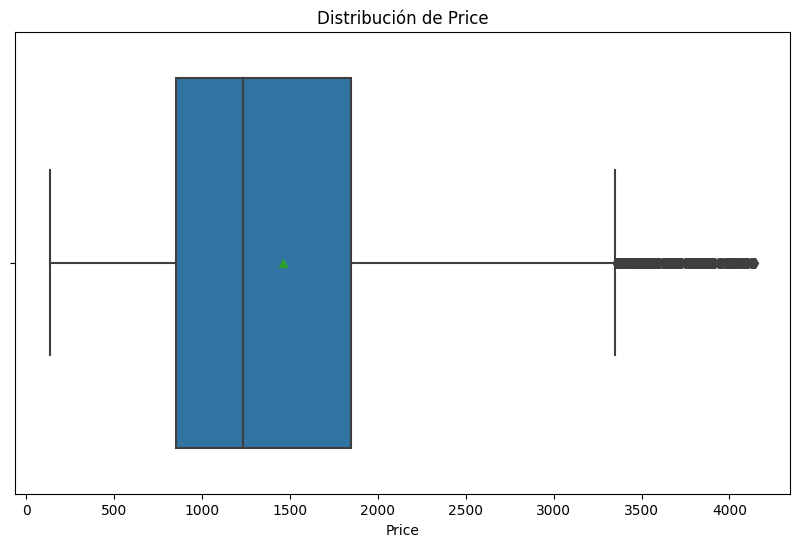

In [30]:
# Gráfico de caja para price. Mostrar media
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_price_irq, x='price', showmeans=True)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.show()

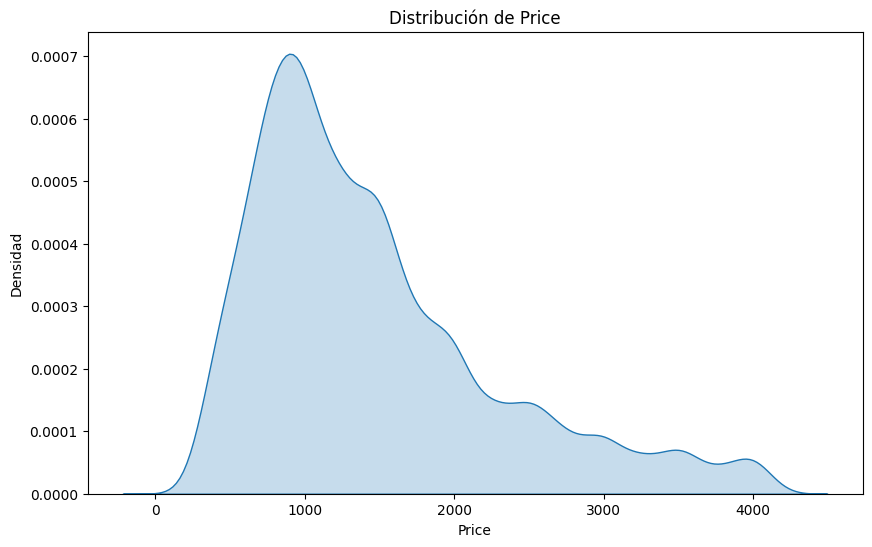

In [31]:
# Grafico de densidad de price
plt.figure(figsize=(10, 6))
sns.kdeplot(clean_price_irq['price'], fill=True)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Densidad')
plt.show()

#### Comentario sobre el análisis de esta variable:

Los precios de alquiler varían considerablemente en el conjunto de datos, con un rango que va desde $136 hasta $1,000,000 por día. La mediana de $1350 indica que el precio medio es moderado, pero la desviación estándar relativamente alta de $17,648 sugiere una gran variabilidad en los precios.

El valor mínimo de $136 representa propiedades económicas, mientras que el valor máximo de $1,000,000 puede indicar propiedades de lujo o valores atípicos extremadamente altos.

El primer cuartil (25%) de $890 y el tercer cuartil (75%) de $2191.5 proporcionan información sobre la distribución de los precios dentro del conjunto de datos.

Los gráficos de caja tomando el cuenta los outliers superiores hacen notar que hay una gran cantidad de datos que se encuentran por encima del tercer cuartil. Por lo que se puede decir que hay una gran cantidad de propiedades con precios altos. 

Ya con los outliers superiores eliminados se puede ver una distribución más clara de los datos aunque un poco sesgada a la derecha.

### 5. availability_365

In [32]:
# Estadísticas descriptivas de availability_365
print(listings_df['availability_365'].describe())
print()

# Mediana
print(f"Mediana: {listings_df['availability_365'].median()}")

count    18879.000000
mean       220.975475
std        140.306035
min          0.000000
25%         89.000000
50%        266.000000
75%        361.000000
max        365.000000
Name: availability_365, dtype: float64

Mediana: 266.0


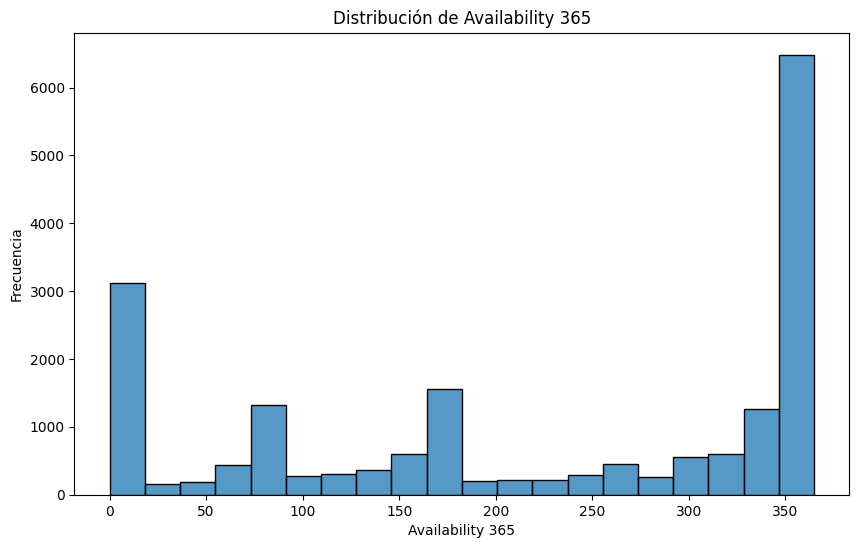

In [33]:
# Histograma de availability_365
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['availability_365'], bins=20)
plt.title('Distribución de Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Frecuencia')
plt.show()

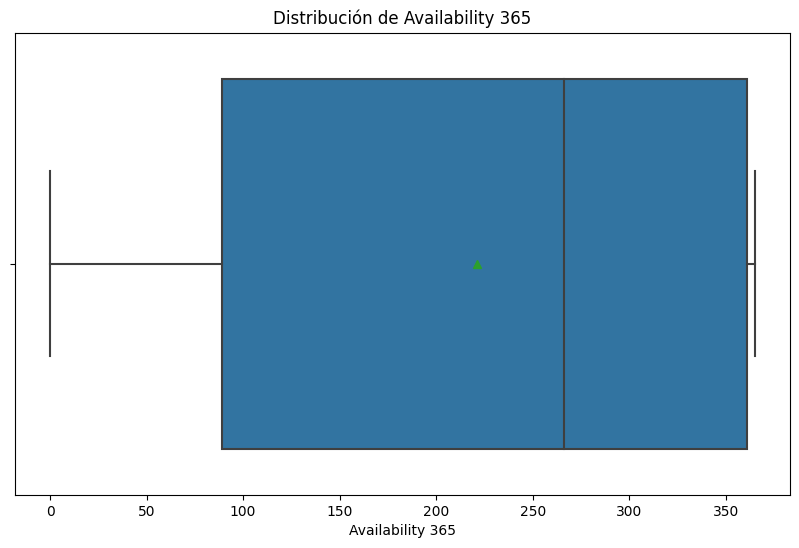

In [34]:
# Grafico de caja de availability_365. Mostrar media
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_df, x='availability_365', showmeans=True)
plt.title('Distribución de Availability 365')
plt.xlabel('Availability 365')
plt.show()

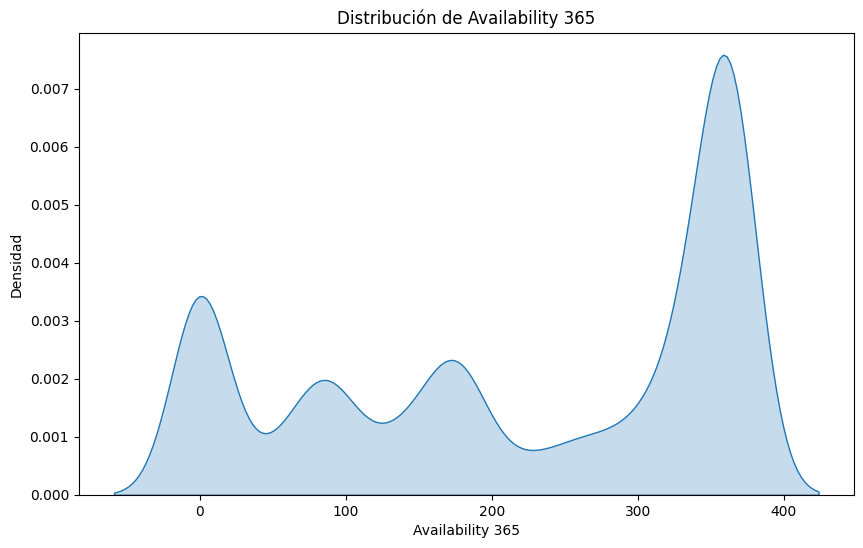

In [35]:
# Gráfico de densisdad de availability_365
plt.figure(figsize=(10, 6))
sns.kdeplot(data=listings_df, x='availability_365', fill=True)
plt.title('Distribución de Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Densidad')
plt.show()

#### Comentario sobre el análisis de esta variable:

La disponibilidad de las propiedades varía en el conjunto de datos, con un rango que va desde 0 días (indicando que algunas propiedades no están disponibles en absoluto) hasta 365 días (indicando disponibilidad durante todo el año).

La mediana de 266 días sugiere que la mayoría de las propiedades tienen una alta disponibilidad, lo que podría ser atractivo para los huéspedes.

El valor mínimo de 0 días indica que algunas propiedades no están disponibles en absoluto, lo que podría ser una consideración importante para los inversores.

El primer cuartil (25%) de 89 días y el tercer cuartil (75%) de 361 días proporcionan información sobre la distribución de la disponibilidad dentro del conjunto de datos.

El histograma muestra que hay un número importante de propiedades con disponibilidad de 0 días, pero en su mayoría las propiedades tienen una disponiblidad alta, esto es corroborado también por el gráfico de densidad que muestra un sesgo a la izquieda.

## 3. Estrategia de análisis

El objetivo principal del análisis de centrará en darle a los inversionistas una visión profunda y completa del mercado de alquiler de propiedades de Airbnb en Bangkok. 

Para lograr esto se realizarán cálculos de estadísticas descriptivas básicas para comprender la distribución y la variabilidad de atributos clave (estos cálculos ya fueron hechos en las celdas superiores). De la misma manera se utilizarán técnicas gráficas como graficos de barras, graficos de densisdad, histogramas y boxplots (dependiendo del tipo de dato) para visualizar la distribución de los datos y encontrar patrones y tendencias.

Ahora bien, para lograr el objetivo principal se realizarán análisis multivariados para comprender las relaciones entre los atributos. Particularmente, graficos de dispersión y mapas de calor ayudarán a establecer relaciones y patrones entre variables. En este caso las variables que son de interés para relacionar con las demás son precio y disponibilidad. Adicionalmente, también se pensó en el review score pero sus datos nulos representan un 35% de los datos totales por lo que se decidió no incluirlo en el análisis.

Finalmente, a partir de estas variables se realizará un análisis de segmentación para identificar tendencias especificas en función de categorías como el tipo de propiedad y la ubicación geográfica. si esta segmentación resulta exitosa ayudará a los inversionistas comprender qué categorías pueden ser mas rentables y populares. 

Todo esto generará información sólida que permitirá tomar decisiones sobre las mejores oportunidades de inversión en el mercado de alquiler de Airbnb en Bangkok.

## 4. Desarrollo de la estrategia

In [36]:
# Inicialmente vamos a quedarnos con las 5 columnas escogidas:
columanas_escojidas = ["property_type", "room_type", "accommodates", "price", "availability_365"]
listings_df = listings_df[columanas_escojidas]

### Limpieza de los datos

In [37]:
# Ahora vamos a ver si existen valores nulos en estas columnas
listings_df.isnull().sum()

property_type       0
room_type           0
accommodates        0
price               0
availability_365    0
dtype: int64

In [38]:
# ¿Qué tipos de datos tienen estas columnas?
listings_df.dtypes

property_type       object
room_type           object
accommodates         int64
price               object
availability_365     int64
dtype: object

In [39]:
# Volvamos numérico a la columna price
listings_df["price"] = listings_df["price"].apply(convertir_price_a_float)

listings_df.dtypes

property_type        object
room_type            object
accommodates          int64
price               float64
availability_365      int64
dtype: object

In [40]:
# Ahora los tipos de datos son correctos. Pasemos a mirar los valores de las columas no numéricas

# Total de valores únicos por columna
print("Total de valores únicos en property_type:", listings_df["property_type"].nunique())

listings_df["property_type"].value_counts(dropna=False, normalize=True)

Total de valores únicos en property_type: 83


Entire rental unit                    0.314159
Entire condo                          0.199640
Private room in rental unit           0.100959
Room in hotel                         0.054240
Private room in condo                 0.043435
Private room in home                  0.032788
Entire home                           0.031093
Room in boutique hotel                0.025849
Private room in serviced apartment    0.020181
Private room in hostel                0.020022
Private room in townhouse             0.019546
Entire serviced apartment             0.017533
Entire townhouse                      0.016314
Private room in bed and breakfast     0.014831
Shared room in hostel                 0.011812
Room in hostel                        0.009534
Room in aparthotel                    0.007680
Private room                          0.005615
Private room in guesthouse            0.005403
Room in serviced apartment            0.005191
Entire loft                           0.004820
Room in bed a

In [41]:
# Nótese que existen 83 valores categóricos en esta columna. Lo que para propósitos de análisis es muy elevado. 
# Lo mejor es de alguna manera agrupar los valores para reducir la dimensionalidad de esta columna.

# Aquellos valores que tienen menos del 10% de frecuencia se van a agrupar de la siguiente manera:
# other_hotel_rooms, other_private_rooms, other_room_units, other_entire_units, other_shared_units, other_listisngs

# Aquellos valores que tengan la palabra hotel y room se van a agrupar en other_hotel_rooms
# Aquellos valores que tengan la palabra private y room se van a agrupar en other_private_rooms
# Aquellos valores que tengan la palabra room y no pertenezcan a los anteriores se van a agrupar en other_room_units
# Aquellos valores que tengan la palabra entire se van a agrupar en other_entire_units
# Aquellos valores que tengan la palabra shared se van a agrupar en other_shared_units
# Aquellos valores que no tengan las palabras anteriores se van a agrupar en other_listings
# Regla: los valores no pueden pertenecer a las categorías con mas de 10% de frecuencia. Entire rental unit, Entire condo, Private room in rental unit
def agrupar_property_type(value):

    lowe_case_value = value.lower()

    if value in ["Entire rental unit", "Entire condo", "Private room in rental unit"]:
        return value
    elif "hotel" in lowe_case_value and "room" in lowe_case_value:
        return "Other_hotel_rooms"
    elif "private" in lowe_case_value and "room" in lowe_case_value:
        return "Other_private_rooms"
    elif "room" in lowe_case_value:
        return "Other_room_units"
    elif "entire" in lowe_case_value:
        return "Other_entire_units"
    elif "shared" in lowe_case_value:
        return "Other_shared_units"
    else:
        return "Other_listings"


# Aplicar la función agrupar_property_type a la columna property_type
listings_df["property_type"] = listings_df["property_type"].apply(agrupar_property_type)

In [42]:
# Total de valores únicos por columna
print("Total de valores únicos en property_type:", listings_df["property_type"].nunique())

listings_df["property_type"].value_counts(dropna=False, normalize=True)

Total de valores únicos en property_type: 8


Entire rental unit             0.314159
Entire condo                   0.199640
Other_private_rooms            0.172520
Private room in rental unit    0.100959
Other_hotel_rooms              0.091107
Other_entire_units             0.079347
Other_room_units               0.040256
Other_listings                 0.002013
Name: property_type, dtype: float64

In [43]:
# En este caso tentmos un 0.2% de valores en other listings. Lo cual corresponde a 37 datos. Lo cual es despreciable. Así que vamos a eliminarlos
listings_df = listings_df[listings_df["property_type"] != "Other_listings"]

print("Total de valores únicos en property_type:", listings_df["property_type"].nunique())

listings_df["property_type"].value_counts(dropna=False, normalize=True)

Total de valores únicos en property_type: 7


Entire rental unit             0.314792
Entire condo                   0.200042
Other_private_rooms            0.172868
Private room in rental unit    0.101162
Other_hotel_rooms              0.091290
Other_entire_units             0.079507
Other_room_units               0.040338
Name: property_type, dtype: float64

In [44]:
# Ahora vamos a analizar la columna room_type

print("Total de valores únicos en room_type:", listings_df["room_type"].nunique())

listings_df["room_type"].value_counts(dropna=False, normalize=True)

Total de valores únicos en room_type: 4


Entire home/apt    0.597208
Private room       0.345152
Hotel room         0.032005
Shared room        0.025636
Name: room_type, dtype: float64

**Importante:** Analizando los datos de las dos últimas columnas vistas se puede ver que realmente son muy parecidas en su contenido. Pasaremos a analizar si verdaderamente vale la pena conservar las dos. 

In [45]:
# Correlación entre property_type y room_type: dos variables categóricas
pd.crosstab(listings_df["property_type"], listings_df["room_type"], normalize="index")

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Entire condo,1.000000,0.000000,0.00000,0.000000
Entire rental unit,1.000000,0.000000,0.00000,0.000000
Other_entire_units,1.000000,0.000000,0.00000,0.000000
Other_hotel_rooms,0.031395,0.152907,0.77907,0.036628
Other_private_rooms,0.000000,0.000000,1.00000,0.000000
Other_room_units,0.000000,0.447368,0.00000,0.552632
Private room in rental unit,0.000000,0.000000,1.00000,0.000000


Se puede ver que hay una correlación muy alta entre la agrupación hecha en property_type con la variable room_type. De hecho por los valores de la correlación es muy facil determinar el por qué de la correlación. Siendo así, podemos eliminar alguna de las dos columnas. En este caso se decidió eliminar la columna de property_type pues room_type es más específico y no se han hecho modificaciones sobre los datos.

In [46]:
# Eliminar la columna property_type
listings_df.drop(columns=["property_type"], inplace=True)

Respecto a acoomodates como bien revisamos en su distribución no hay outliers muy alejados de la media. Así que no es necesario eliminarlos

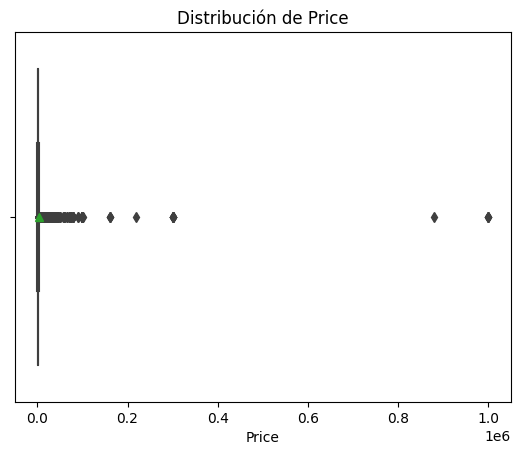

In [47]:
# Respecto a price si hay problemas. Pues hay valores muy alejados de la media. Pasaremos a verlos de nuevo.
sns.boxplot(data=listings_df, x="price", showmeans=True)
plt.title("Distribución de Price")
plt.xlabel("Price")
plt.show()

Text(0.5, 0, 'Price')

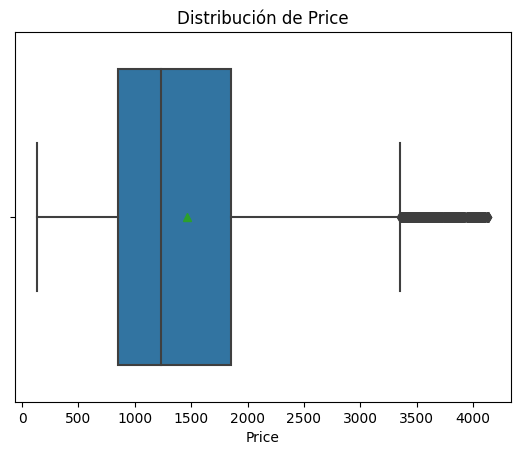

In [48]:
# En terminos de inversiones inmobiliarias, es muy poco probable que un inversionista se concentre en valores de propiedades muy elevadas.
# Por ello vamos a eliminar outliers de prices a través de la regla IRQ.

# Clean price quantiles
q1 = listings_df['price'].quantile(0.25)
q3 = listings_df['price'].quantile(0.75)

iqr = q3 - q1

listings_df = listings_df[(listings_df['price'] <= q3 + 1.5 * iqr)]

sns.boxplot(data=listings_df, x="price", showmeans=True)
plt.title("Distribución de Price")
plt.xlabel("Price")


In [49]:
# ¿Datos restantes?
print(f"Datos restantes: {len(listings_df)}. Cantidad original: 18879")

Datos restantes: 17153. Cantidad original: 18879


Respecto a availability_365 como bien revisamos en su distribución no hay outliers muy alejados de la media. Además tenemos cota inferior y superior bien definida.

### Revisión de correlaciones

<Axes: >

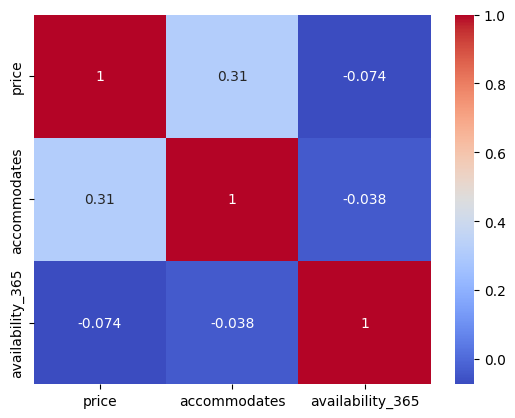

In [50]:
# Correlaciones entre variables numéricas. price, accommodates, availability_365
sns.heatmap(listings_df[["price", "accommodates", "availability_365"]].corr(), annot=True, cmap="coolwarm")

In [51]:
# Imprirmir correlaciones:
print(listings_df[["price", "accommodates", "availability_365"]].corr())


                     price  accommodates  availability_365
price             1.000000      0.312909         -0.073878
accommodates      0.312909      1.000000         -0.038109
availability_365 -0.073878     -0.038109          1.000000


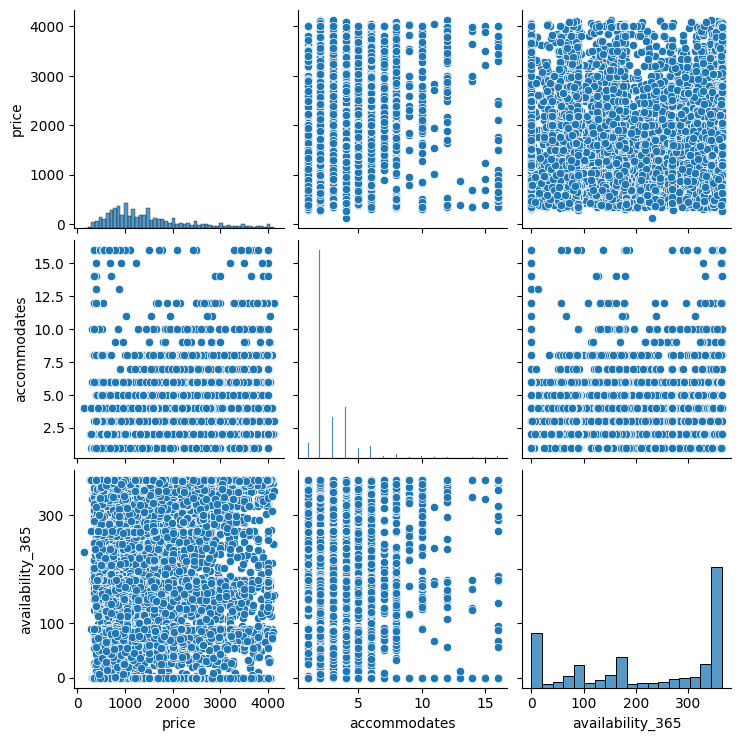

In [52]:
# Mapas de de dispersión entre variables numéricas. price, accommodates, availability_365
sns.pairplot(listings_df[["price", "accommodates", "availability_365"]])

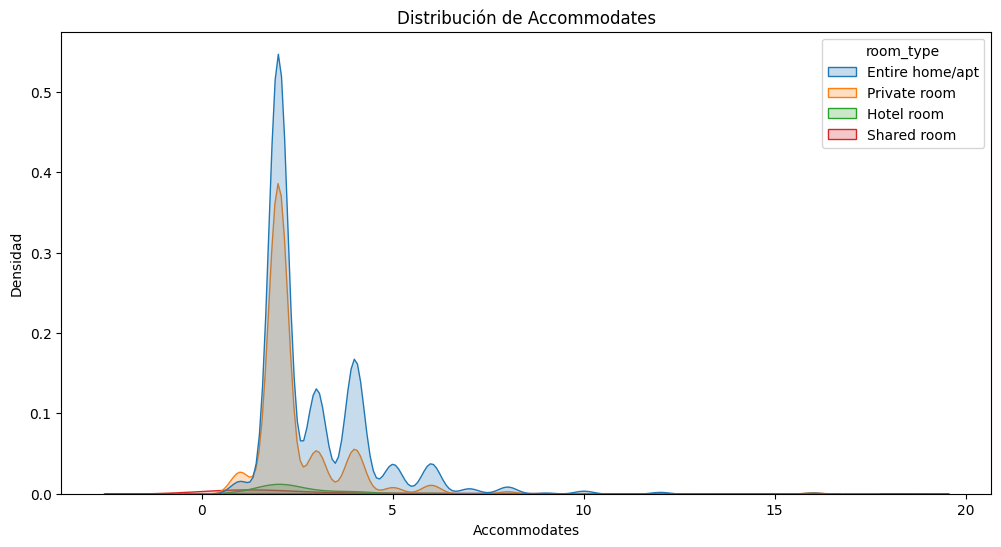

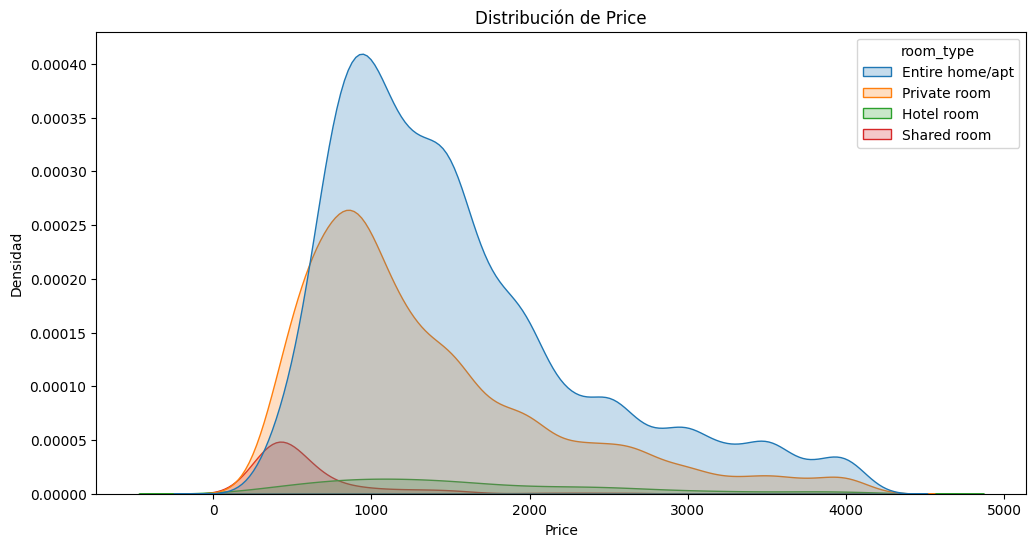

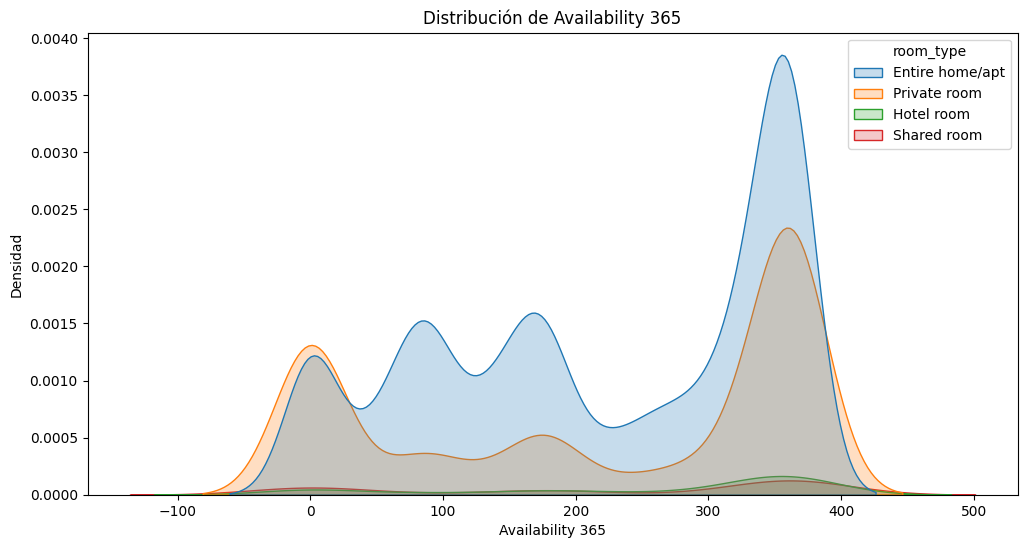

In [53]:
# Correlación entre variables numéricas y categóricas. room_type y acoommodates
plt.figure(figsize=(12, 6))
sns.kdeplot(data=listings_df, x="accommodates", hue="room_type", fill=True)
plt.title("Distribución de Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Densidad")
plt.show()

# Correlación entre variables numéricas y categóricas. room_type y price
plt.figure(figsize=(12, 6))
sns.kdeplot(data=listings_df, x="price", hue="room_type", fill=True)
plt.title("Distribución de Price")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()

# Correlación entre variables numéricas y categóricas. room_type y availability_365
plt.figure(figsize=(12, 6))
sns.kdeplot(data=listings_df, x="availability_365", hue="room_type", fill=True)
plt.title("Distribución de Availability 365")
plt.xlabel("Availability 365")
plt.ylabel("Densidad")
plt.show()


In [54]:
# Relación entre room_type y accommodates
property_type_summary = listings_df.groupby('room_type').agg({'accommodates': ['mean', 'median', 'std']})
property_type_summary.columns = ['Promedio', 'Mediana', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Promedio', ascending=False)
print(property_type_summary)
print()

# Relación entre room_type y price
property_type_summary = listings_df.groupby('room_type').agg({'price': ['mean', 'median', 'std']})
property_type_summary.columns = ['Precio Promedio', 'Precio Mediano', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Precio Promedio', ascending=False)
print(property_type_summary)
print()

# Relación entre room_type y availability_365
property_type_summary = listings_df.groupby('room_type').agg({'availability_365': ['mean', 'median', 'std']})
property_type_summary.columns = ['Promedio', 'Mediana', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Promedio', ascending=False)
print(property_type_summary)
print()

# Relación entre accommodates y price
property_type_summary = listings_df.groupby('accommodates').agg({'price': ['mean', 'median', 'std']})
property_type_summary.columns = ['Precio Promedio', 'Precio Mediano', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Precio Promedio', ascending=False)
print(property_type_summary)
print()

# Relación entre accommodates y availability_365
property_type_summary = listings_df.groupby('accommodates').agg({'availability_365': ['mean', 'median', 'std']})
property_type_summary.columns = ['Promedio', 'Mediana', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Promedio', ascending=False)
print(property_type_summary)
print()

# Relación entre price y availability_365
property_type_summary = listings_df.groupby('price').agg({'availability_365': ['mean', 'median', 'std']})
property_type_summary.columns = ['Promedio', 'Mediana', 'Desviación Estándar']
property_type_summary = property_type_summary.sort_values(by='Promedio', ascending=False)
print(property_type_summary)
print()


                 Promedio  Mediana  Desviación Estándar
room_type                                              
Shared room      3.806867      2.0             4.060462
Hotel room       2.942857      2.0             2.003269
Entire home/apt  2.931395      2.0             1.568613
Private room     2.503193      2.0             1.427195

                 Precio Promedio  Precio Mediano  Desviación Estándar
room_type                                                            
Hotel room           1623.316327          1400.0           923.770718
Entire home/apt      1549.510491          1350.0           821.122419
Private room         1357.885882          1100.0           810.590799
Shared room           639.403433           466.5           497.871111

                   Promedio  Mediana  Desviación Estándar
room_type                                                
Hotel room       256.148980    341.0           135.933688
Shared room      228.000000    348.0           155.143430
Entire hom

### Resultados del análisis multivariado:

**Precio vs. Capacidad (accommodates):** Existe una correlación positiva moderada (0.31) entre el precio y la capacidad de alojamiento (cuántas personas puede alojar una propiedad). Esto sugiere que, en general, a medida que aumenta la capacidad de alojamiento, es probable que el precio del alquiler también aumente. Sin embargo, esta relación no es muy fuerte, lo que significa que otros factores también influyen en el precio.

**Precio vs. Disponibilidad a lo largo del año (availability_365):** Existe una correlación negativa débil (-0.07) entre el precio y la disponibilidad a lo largo del año. Esto indica que las propiedades con precios más altos tienden a tener una menor disponibilidad. Es decir, las propiedades más caras pueden estar reservadas con mayor frecuencia, lo que limita su disponibilidad para otros períodos.

**Room Type vs. Capacidad (accommodates):** El análisis por tipo de habitación muestra que las habitaciones compartidas (Shared room) tienen una capacidad promedio significativamente mayor (3.81) en comparación con otras categorías, como habitaciones de hotel (Hotel room), casas enteras (Entire home/apt) y habitaciones privadas (Private room). Esto podría ser una consideración importante para los huéspedes que buscan alojamiento compartido.

**Room Type vs. Precio:** El tipo de habitación influye en el precio promedio. Las habitaciones de hotel (Hotel room) tienen el precio promedio más alto, seguidas de casas enteras (Entire home/apt) y habitaciones privadas (Private room). Las habitaciones compartidas (Shared room) tienden a ser más asequibles en promedio.

**Room Type vs. Disponibilidad a lo largo del año:** Las habitaciones compartidas (Shared room) tienen una disponibilidad promedio más baja en comparación con otras categorías, lo que sugiere que estas habitaciones pueden estar más solicitadas o reservadas con mayor frecuencia.

### Segmentación

In [55]:
# Realizar una segmentación por K-Means de los datos restantes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Hacer one-hot encoding de la columna room_type
listings_df = pd.get_dummies(listings_df, columns=["room_type"])

# Crear el modelo de K-Means, para ellos se probarán varios valores de K y se definirá el mejor a través del coeficiente de silueta

k_values = range(2, 5)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(listings_df)
    # Imprimir el coeficiente de silueta
    print(f"K: {k}. Coeficiente de silueta: {silhouette_score(listings_df, kmeans.labels_)}")

K: 2. Coeficiente de silueta: 0.6200461565662243
K: 3. Coeficiente de silueta: 0.5258073150092859
K: 4. Coeficiente de silueta: 0.4884847691847541


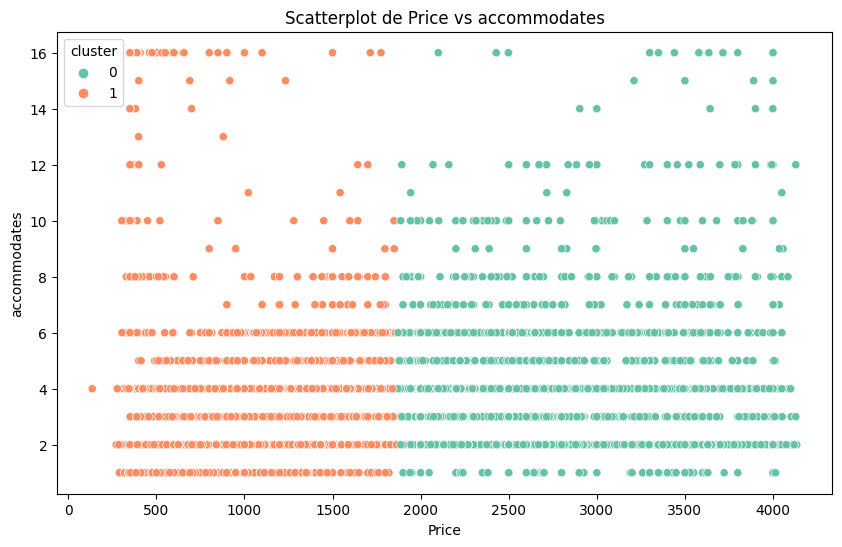

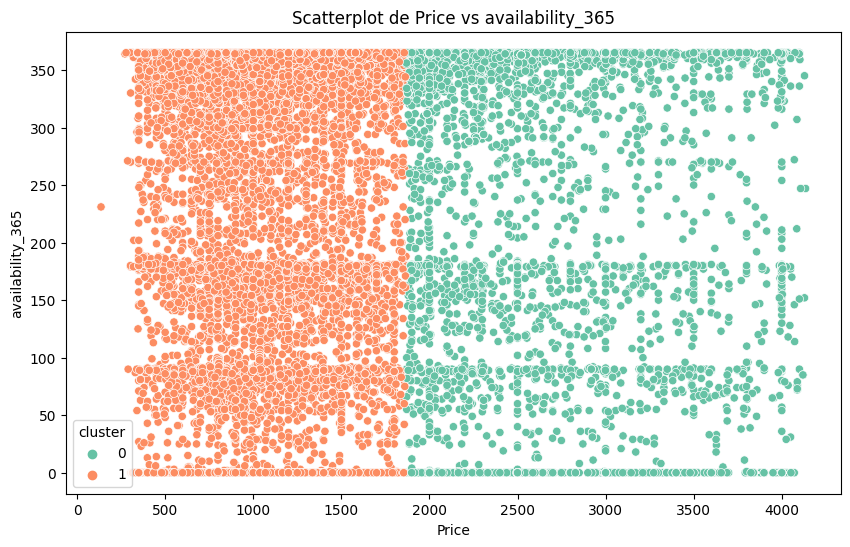

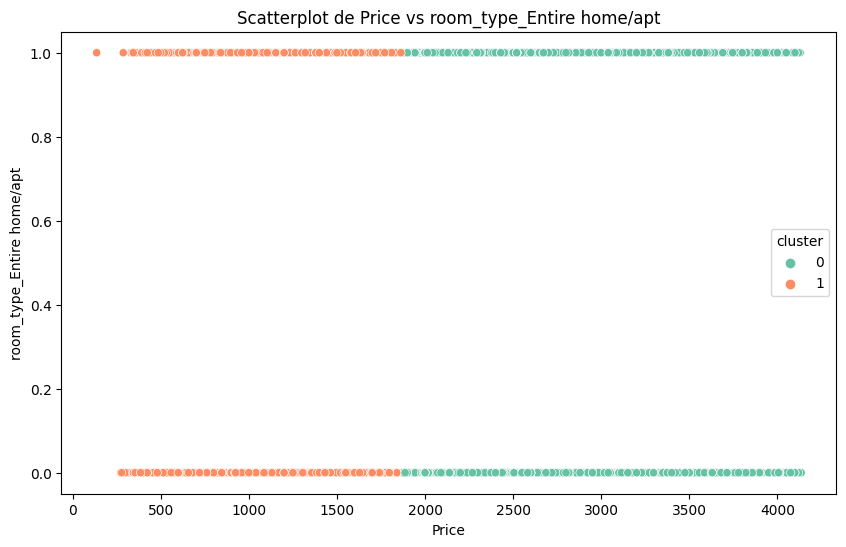

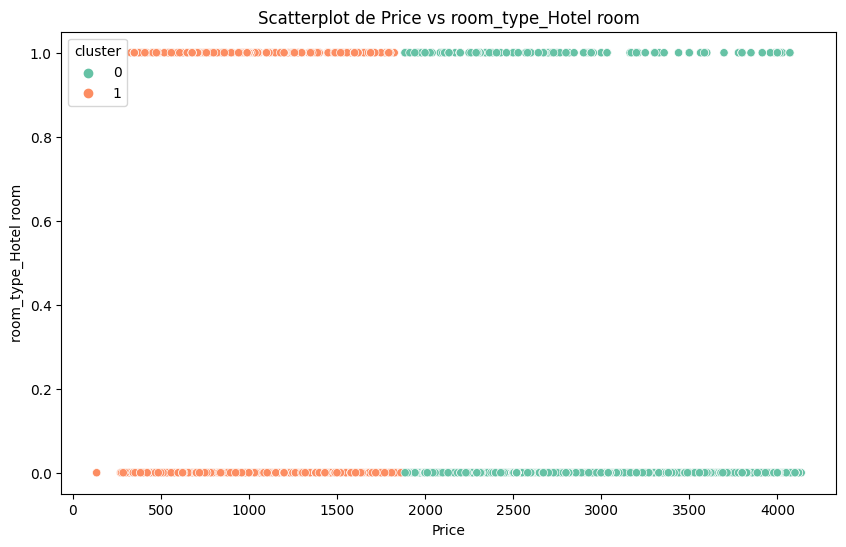

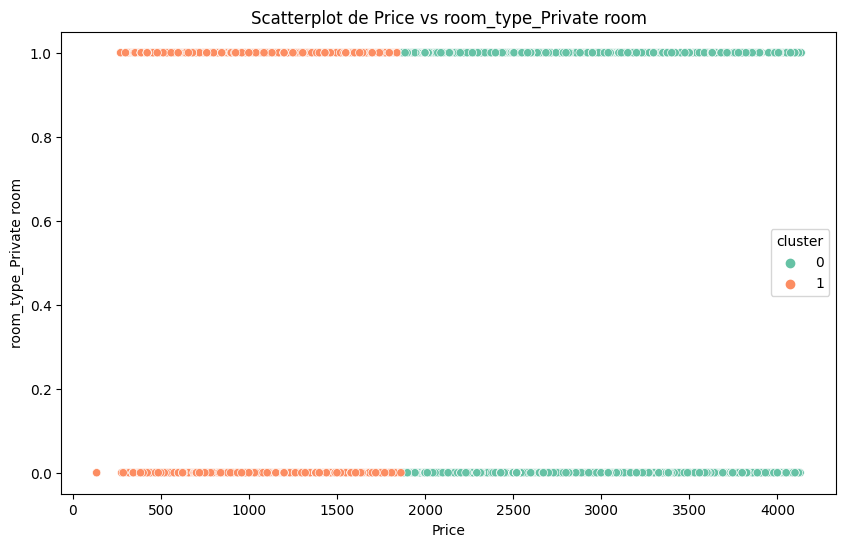

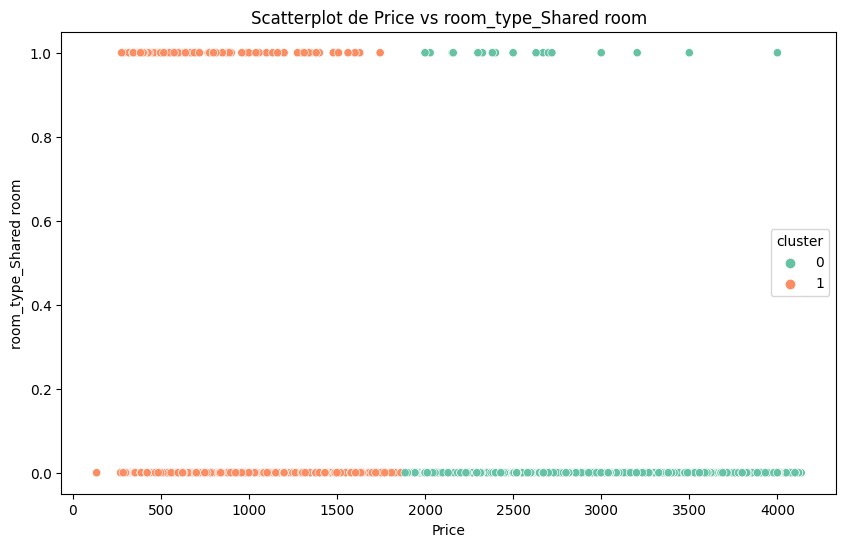

In [56]:
# El número ideal de clusters es 2. Vamos a crear el modelo con este valor de K. 
model = KMeans(n_clusters=2, random_state=42)
model.fit(listings_df)

# Agregar la columna cluster al dataframe
listings_df["cluster"] = model.labels_

# Columna precio. Análisis.
col = ["price"]

# Scaterplot de prive vs las diferentes columnas
for col in listings_df.columns:
    if col != "price" and col != "cluster":
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=listings_df, x="price", y=col, hue="cluster", palette="Set2")
        plt.title(f"Scatterplot de Price vs {col}")
        plt.xlabel("Price")
        plt.ylabel(col)
        plt.show()

###  Resultados de la segentación:

Se aplicó el algoritmo de clustering K-means a los datos preprocesados. Se ejecutaron varios valores de k (número de clusters) y se evaluaron utilizando el coeficiente de silueta. Se determinó que el mejor número de clusters fue 2, con un coeficiente de silueta de 0.62.

Los resultados de la segmentación utilizando K-means revelaron que, en última instancia, el atributo que más influye en la agrupación de las propiedades es el precio de alquiler.

A pesar de aplicar el algoritmo K-means con un coeficiente de silueta razonable, los resultados de la segmentación no encontraron patrones o características distintivas en otros atributos que influyeran significativamente en la segmentación además del precio. Por lo que se considera que la segmentación no fue relevante en el objetivo del proyecto.

### Insights extraidos de todo el análisis:

Basandonos en los resultados obtenidos del análisis de mercado se pueden proponer algunas estrategias de inversión para los inversionistas teniendo en cuenta las relaciones encontradas entre los datos.

**Diferenciación de Precios por Capacidad:** Dado que existe una correlación positiva entre el precio y la capacidad de alojamiento, los inversionistas pueden considerar establecer tarifas diferenciadas según la capacidad de la propiedad. Esto significa que podrían cobrar más por propiedades con mayor capacidad y menos por aquellas con capacidad limitada.

**Promoción de Habitaciones Compartidas:** Si los datos muestran que las habitaciones compartidas (Shared room) tienen una capacidad promedio más alta, los inversionistas pueden promocionar estas opciones como una forma rentable de alojamiento para grupos más grandes o familias. Esto podría atraer a un segmento de mercado específico.

**Estrategias de Fijación de Precios por Tipo de Habitación:** Dado que el tipo de habitación influye en el precio promedio, los inversionistas pueden ajustar sus estrategias de fijación de precios en consecuencia. Por ejemplo, podrían establecer precios competitivos para habitaciones compartidas para atraer a viajeros con presupuestos ajustados y precios premium para habitaciones de hotel de lujo.

**Optimización de la Disponibilidad:** Como la disponibilidad a lo largo del año está relacionada con el precio, los inversionistas pueden optimizar la disponibilidad de sus propiedades para maximizar los ingresos. Esto podría implicar bloquear ciertos períodos para reservas a tarifas más altas y ofrecer descuentos durante la temporada baja.


Es importante que los inversionistas sigan monitoreando las tendencias del mercado y ajusten sus estrategias en consecuencia. Los datos de disponibilidad y precios pueden cambiar con el tiempo, y es fundamental estar al tanto de la demanda y la competencia en la plataforma.